In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('datasets/breast-cancer-wisconsin.csv',delimiter=';',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data.shape

(699, 11)

In [5]:
X = data.iloc[:,1:10].values
y = data.iloc[:,10].values

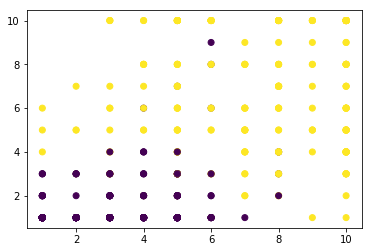

In [6]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.show()

In [7]:
X = X[:,[0,1]]

In [8]:
y = np.where(y == 2, -1, 1)

### Perceptron

In [9]:
class Perceptron(object):
    def __init__(self, learning_rate = 0.01, n_iter = 30, random_state = 1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        w_ale = np.random.RandomState(self.random_state)
        self.w = w_ale.normal(loc = 0.0, scale = 0.1, size = 1 + X.shape[1])
        self.errors = []
        
        for i in range(self.n_iter):
            error = 0
            for Xi, label in zip(X,y):
                update = self.learning_rate * (label - self.predict(Xi))
                self.w[1:] = self.w[1:] + (update * (Xi * 1.0))
                self.w[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
            
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [10]:
model_perceptron = Perceptron()

In [11]:
model_perceptron.fit(X,y)

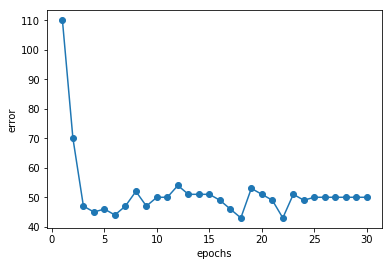

In [12]:
plt.plot(range(1,len(model_perceptron.errors)+1), model_perceptron.errors, marker='o')
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

### Adaline GD

In [21]:
class AdalineGD(object):
    def __init__(self, learning_rate = 0.01, n_iter=30, random_state = 1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        w_ale = np.random.RandomState(self.random_state)
        self.w = w_ale.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w[1:] = self.w[1:] + (self.learning_rate * X.T.dot(errors) * 1.0)
            self.w[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [35]:
model_adelinegd = AdalineGD()

In [36]:
model_adelinegd.fit(X,y)

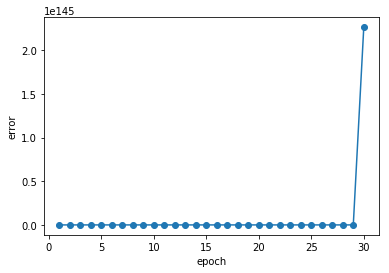

In [38]:
plt.plot(range(1,len(model_adelinegd.cost)+1), model_adelinegd.cost, marker='o')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

### Adaline SGD

In [45]:
class AdalineSGD(object):
    def __init__(self, learning_rate=0.01, n_iter=30, shuffle=True, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.w_ini = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        self.ini_w(X.shape[1])
        self.cost = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self.shuf(X,y)
            cost = []
            for Xi, label in zip(X,y):
                cost.append(self.update_w(Xi,label))
            average = sum(cost) / len(y)
            self.cost.append(average)
        
        return self
    
    def shuf(self, X, y):
        idx = self.w_ale.permutation(len(y))
        return X[idx], y[idx]
    
    def ini_w(self, m):
        self.w_ale = np.random.RandomState(self.random_state)
        self.w = self.w_ale.normal(loc = 0.0, scale = 0.1, size = 1 + m)
        self.w_ini = True
    
    def update_w(self, Xi, label):
        output = self.activation(self.net_input(Xi))
        error = (label - output)
        self.w[1:] = self.w[1:] + self.learning_rate * (Xi.dot(error) * 1.0)
        self.w[0] += self.learning_rate * error
        cost = error**2 / 2.0
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

In [46]:
model_adelinesgd = AdalineSGD()

In [47]:
model_adelinesgd.fit(X,y)

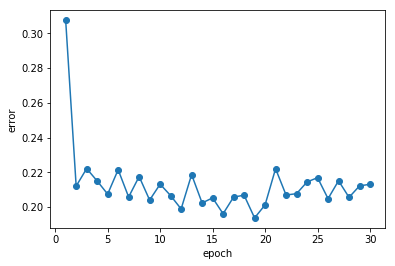

In [48]:
plt.plot(range(1,len(model_adelinesgd.cost)+1), model_adelinesgd.cost, marker='o')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()